In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [26]:
def str_to_date(text: str):
    if text and re.match(r'\d{4}-\d{2}-\d{2}', text):
        return pd.to_datetime(text, errors='coerce')
    return pd.NaT

In [27]:
FILE = './data/append.xlsx'

df = pd.read_excel(FILE)

df = df.drop_duplicates(subset='link')

df['scrapped_comments'] = df['comments_text'].apply(lambda x: len(str(x).split('|')))
total_comments = df['scrapped_comments'].sum()
print(f'Total comments: {total_comments}')

Total comments: 23465


In [28]:
df['date'] = df['date'].astype(str)

dates = df['date'].apply(lambda x: str_to_date(x))
df['date'] = dates
first_date = dates.min()
last_date = dates.max()

print(f'First date: {first_date} | Last date: {last_date}')

First date: 2020-12-12 00:00:00 | Last date: 2024-12-31 00:00:00


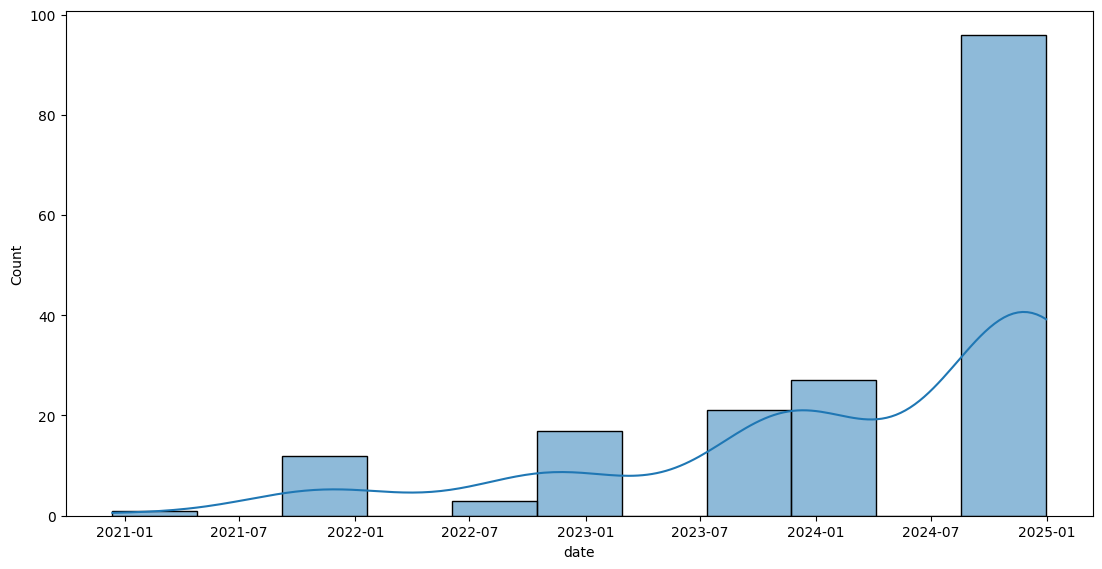

In [29]:
#plot gauss distribution of dates
sns.histplot(dates, kde=True)
plt.tight_layout()
plt.gcf().set_size_inches(12, 6)

In [ ]:
# count comments and group by date
df['month-year'] = df['date'].dt.to_period('M')
df_group = df.groupby('month-year').agg({'scrapped_comments': 'sum'}).reset_index()

#plot comments by date
sns.barplot(data=df_group, x='month-year', y='scrapped_comments')
plt.tight_layout()
plt.gcf().set_size_inches(12, 6)

AttributeError: Can only use .dt accessor with datetimelike values